In [1]:
from src.neural_process import NP

# TODO 
# support keys with more than one dim
# implement kernel attention + viz
# implement setconv attention
# celeb dataset
# gaussian process dataset
# eval logic

model = NP()

In [4]:
from src.sinc_dataset import SincDataset
from src.trainer import TrainModel

from torch.utils.data import DataLoader
import pytorch_lightning as pl
 
# https://github.com/soobinseo/Attentive-Neural-Process
num_context = 0
num_y = 20*3
model = NP()
trainmodel = TrainModel(model)
trainer = pl.Trainer(max_epochs=50, gpus=torch.cuda.device_count(), progress_bar_refresh_rate=20)
trainer.fit(trainmodel, DataLoader(SincDataset(s=num_context+num_y), batch_size=128))

MisconfigurationException: 
                You requested GPUs: [0]
                But your machine only has: []
            

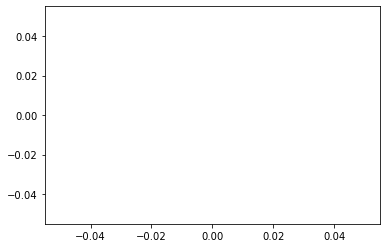

In [5]:
import matplotlib.pyplot as plt

plt.plot([a['loss'] for a in trainmodel.my_log])
#plt.ylim(0, 0.1)

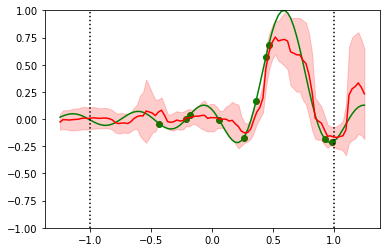

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

xs = np.linspace(-1.25, 1.25, 100, dtype=np.float32)
x, y, a = sample_ds(n=10)
 
#gt
plt.plot(xs, sinc(xs, a), 'g')
 
# context
#context = torch.cat([torch.tensor(x).view([-1, 1]), torch.tensor(y).view([-1, 1])], 1).view([1, -1, 2])[:, :model.num_y]
#plt.scatter(x[:model.num_y], y[:model.num_y], c='g')
context = torch.cat([torch.tensor(x).view([-1, 1]), torch.tensor(y).view([-1, 1])], 1).view([1, -1, 2])
plt.scatter(x, y, c='g')
 
# pred
x_pred = []
y_pred = []
y_std_pred = []
q = torch.tensor(xs).view([1, -1, 1])
for i in range(q.size()[1]):
  a_q = q[0:1, i:i+1, :]
  ret_mu, ret_sigma = model(context, a_q)
  x_pred.append(q[0, i, 0].detach().numpy())
  y_pred.append(ret_mu[0, 0, 0].detach().numpy())
  y_std_pred.append(ret_sigma[0, 0, 0].detach().numpy())

plt.ylim([-1, 1])
plt.axvline(x=-1, ls=':', c='black')
plt.axvline(x=1, ls=':', c='black')
plt.plot(x_pred, y_pred, c='r')
plt.fill_between(x_pred, [y_pred[i]-y_std_pred[i] for i in range(len(x_pred))], [y_pred[i]+y_std_pred[i] for i in range(len(x_pred))], color='r', alpha=0.2)

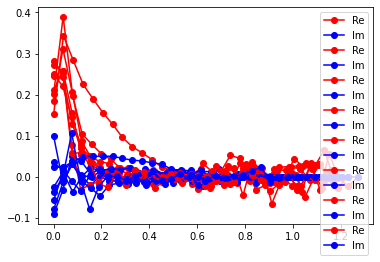

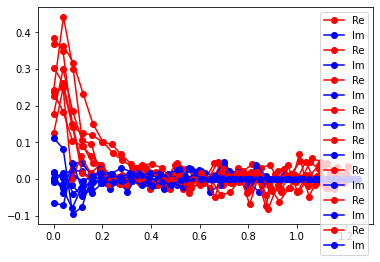

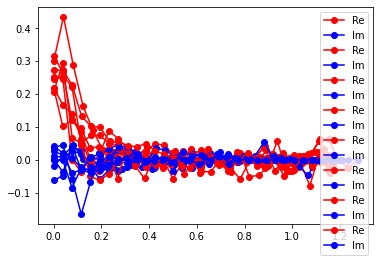

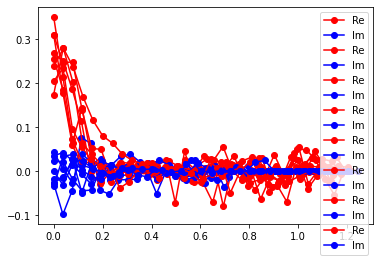

In [ ]:
#viz kernel fourier features
for ca in list(model.cross_attentions): #z_attentions self_attentions
  ca.multihead.viz_kernel_in_fourier_domain()

tensor([[[1.1980]],

        [[1.1908]],

        [[1.1696]],

        [[1.1901]],

        [[1.2066]],

        [[1.2300]],

        [[1.2732]],

        [[1.1689]]], grad_fn=<SelectBackward>)
tensor([[[1.2415]],

        [[1.2035]],

        [[1.1877]],

        [[1.1977]],

        [[1.1735]],

        [[1.2078]],

        [[1.2303]],

        [[1.2500]]], grad_fn=<SelectBackward>)
tensor([[[1.1943]],

        [[1.1988]],

        [[1.2758]],

        [[1.1889]],

        [[1.1954]],

        [[1.2107]],

        [[1.1805]],

        [[1.2000]]], grad_fn=<SelectBackward>)
tensor([[[1.1715]],

        [[1.1924]],

        [[1.1856]],

        [[1.1950]],

        [[1.2016]],

        [[1.2159]],

        [[1.1819]],

        [[1.2444]]], grad_fn=<SelectBackward>)


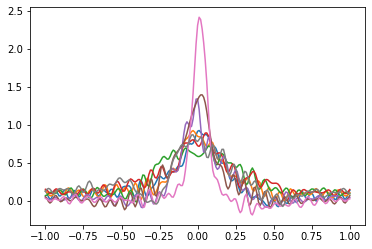

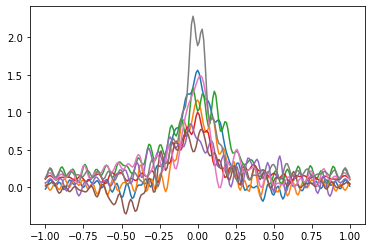

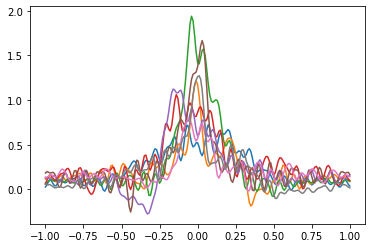

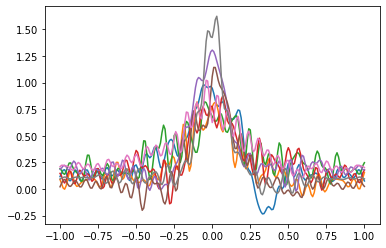

In [ ]:
import torch

#viz kernel fourier features
for ca in list(model.cross_attentions):#+list(model.self_attentions): #z_attentions self_attentions
  ca.multihead.viz_kernel_in_spatial_domain()